# DS 3000 - Practicum 1 (Group 5)

#### Explain all steps to ensure that TAs can understand the output from your analysis. 
#### Note: the purpose of this practicum is to tell a story with the data. Ensure that your work is easy to understand.

In [1]:
# Cleaning / preparing the data
import pandas as pd

aviation_df = pd.read_csv(
    "NTSBAviationData.csv", 
    encoding="latin1",
    low_memory=False
)

print(aviation_df.head())
print(aviation_df.info())
print(aviation_df.shape)

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

### (I) Converting to appropriate data types

In [2]:
# Conversion after inspecting data dictionary

# from object to string
aviation_df['Event.Id'] = aviation_df['Event.Id'].astype('string')
aviation_df['Accident.Number'] = aviation_df['Accident.Number'].astype('string')
aviation_df['Location'] = aviation_df['Location'].astype('string')
aviation_df['Country'] = aviation_df['Country'].astype('string')
aviation_df['Airport.Code'] = aviation_df['Airport.Code'].astype('string')
aviation_df['Airport.Name'] = aviation_df['Airport.Name'].astype('string')
aviation_df['Registration.Number'] = aviation_df['Registration.Number'].astype('string')
aviation_df['Make'] = aviation_df['Make'].astype('string')
aviation_df['Model'] = aviation_df['Model'].astype('string')
aviation_df['Air.carrier'] = aviation_df['Air.carrier'].astype('string')

# from object to category because they have a limited set of values
aviation_df['Injury.Severity'] = aviation_df['Injury.Severity'].astype('category')
aviation_df['Investigation.Type'] = aviation_df['Investigation.Type'].astype('category')
aviation_df['Aircraft.damage'] = aviation_df['Aircraft.damage'].astype('category')
aviation_df['Aircraft.Category'] = aviation_df['Aircraft.Category'].astype('category')
aviation_df['Amateur.Built'] = aviation_df['Amateur.Built'].astype('category')
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].astype('category')
aviation_df['FAR.Description'] = aviation_df['FAR.Description'].astype('category')
aviation_df['Schedule'] = aviation_df['Schedule'].astype('category')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].astype('category')
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].astype('category')
aviation_df['Broad.phase.of.flight'] = aviation_df['Broad.phase.of.flight'].astype('category')
aviation_df['Report.Status'] = aviation_df['Report.Status'].astype('category')

# from object to datetime
aviation_df['Event.Date'] = pd.to_datetime(
    aviation_df['Event.Date'], 
    errors='coerce',
    dayfirst=False
)
aviation_df['Publication.Date'] = pd.to_datetime(
    aviation_df['Publication.Date'], 
    errors='coerce',
    dayfirst=True 
)

# from object to float
aviation_df['Latitude'] = pd.to_numeric(aviation_df['Latitude'], errors='coerce')
aviation_df['Longitude'] = pd.to_numeric(aviation_df['Longitude'], errors='coerce')

# from float to int
aviation_df['Number.of.Engines'] = (
    pd.to_numeric(aviation_df['Number.of.Engines'], errors='coerce').astype('Int64')
)
aviation_df['Total.Fatal.Injuries'] = (
    pd.to_numeric(aviation_df['Total.Fatal.Injuries'], errors='coerce').astype('Int64')
)
aviation_df['Total.Serious.Injuries'] = (
    pd.to_numeric(aviation_df['Total.Serious.Injuries'], errors='coerce').astype('Int64')
)
aviation_df['Total.Minor.Injuries'] = (
    pd.to_numeric(aviation_df['Total.Minor.Injuries'], errors='coerce').astype('Int64')
)
aviation_df['Total.Uninjured'] = (
    pd.to_numeric(aviation_df['Total.Uninjured'], errors='coerce').astype('Int64')
)

In [3]:
# Recheck the types to see if they properly updated
print(aviation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  string        
 1   Investigation.Type      88889 non-null  category      
 2   Accident.Number         88889 non-null  string        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  string        
 5   Country                 88663 non-null  string        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            50132 non-null  string        
 9   Airport.Name            52704 non-null  string        
 10  Injury.Severity         87889 non-null  category      
 11  Aircraft.damage         85695 non-null  category      
 12  Aircraft.Category       32287 non-null  catego

### (II) Handling missing values

In [4]:
print("Total missing counts per col:\n", aviation_df.isnull().sum())

Total missing counts per col:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  76903
Longitude                 76915
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publicati

#### Which handling strategy for missing values

We're not going to drop rows with missing values, because some rows necessary for analysis such as Aircraft Category have a significant number of missing values (56602 out of 88889, so around 64%), and we'd lose a lot of valuable data by doing so that could skew our results. So we will instead fill in missing values with appropriate values.

In [5]:
# Fill missing values for categories/strings with "Unknown"
columns_string_unknown = [
    'Location', 'Country', 'Make', 'Model',
    'Registration.Number', 'Airport.Code', 
    'Airport.Name', 'Air.carrier'
]

columns_category_unknown = [
    'Amateur.Built', 'Injury.Severity', 'Aircraft.damage',
    'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
    'Report.Status', 'Aircraft.Category', 'FAR.Description', 
    'Schedule', 'Broad.phase.of.flight'
]

aviation_df[columns_string_unknown] = (
    aviation_df[columns_string_unknown].fillna('Unknown')
)

for col in columns_category_unknown:
    if 'Unknown' not in aviation_df[col].unique():
        aviation_df[col] = aviation_df[col].cat.add_categories('Unknown')
    aviation_df[col] = aviation_df[col].fillna('Unknown')

# printing values to see whether to use mean, median, or mode
columns_numerical = [
    'Number.of.Engines', 'Total.Uninjured', 'Total.Fatal.Injuries',
    'Total.Serious.Injuries', 'Total.Minor.Injuries'
]

for col in columns_numerical:
    print(aviation_df[col].unique())

<IntegerArray>
[1, <NA>, 2, 0, 3, 4, 8, 6]
Length: 8, dtype: Int64
<IntegerArray>
[   0, <NA>,   44,    2,    1,    3,    6,    4,  149,   12,
 ...
  295,  321,  521,  301,  294,  378,  207,  406,  251,  455]
Length: 380, dtype: Int64
<IntegerArray>
[   2,    4,    3,    1, <NA>,    0,    8,   78,    7,    6,
 ...
   58,  162,  150,  224,   62,   66,  112,  188,   41,  176]
Length: 126, dtype: Int64
<IntegerArray>
[   0, <NA>,    2,    1,    6,    4,    5,   10,    3,    8,    9,    7,   15,
   17,   28,   26,   47,   14,   81,   13,  106,   60,   16,   21,   50,   44,
   18,   12,   45,   39,   43,   11,   25,   59,   23,   55,   63,   88,   41,
   34,   53,   33,   67,   35,   20,  137,   19,   27,  125,  161,   22]
Length: 51, dtype: Int64
<IntegerArray>
[   0, <NA>,    1,    3,    2,    4,   24,    6,    5,   25,   17,   19,   33,
   14,    8,   13,   15,    7,    9,   16,   20,   11,   12,   10,   38,   42,
   29,   62,   28,   31,   39,   32,   18,   27,   57,   50,   23,  125,  

In [6]:
# We see that for Number of Engines it seems more categorical, so we
# can use the mode for that. For the rest of the numerical columns,
# there seems to be a lot of variance, so it would be best to use
# the median instead of the mean.

# handling missing values in numerical columns:

mode = aviation_df['Number.of.Engines'].mode()[0]
aviation_df['Number.of.Engines'] = (
    aviation_df['Number.of.Engines'].fillna(mode)
)

for i in range (1, len(columns_numerical)):
    col = columns_numerical[i]
    median_value = aviation_df[col].median()
    aviation_df[col] = aviation_df[col].fillna(median_value)

In [7]:
# checking for missing values again
# Note: will be leaving the missing values in latitude, longitude,
# and Publication date since they won't be used for analysis, and
# have a significant amount of missing values.

# this should show 0 for every column except latitude, longitude,
# and Publication date
print("Total missing counts per col:\n", aviation_df.isnull().sum())

Total missing counts per col:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  76903
Longitude                 76915
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description               0
Schedule                      0
Purpose.of.flight             0
Air.carrier                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publicati

### Handling Invalid Data

Now that we've handled missing values, we can deal with handling possibly invalid data.

Note that earlier, we checked for the unique values in numerical columns to see the range of values, and we saw that there were no negative values so we don't need to handle that in this section.

In [8]:
# checking if Event ID's are 14-character alphanumeric values
# according to the data dictionary

invalid_event_ids = (
    aviation_df[(aviation_df['Event.Id'].str.len() != 14) | 
    (~aviation_df['Event.Id'].str.isalnum())]
)

print("Invalid Event IDs due to length or characters:")
print(invalid_event_ids)

Invalid Event IDs due to length or characters:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date]
Index: []

[0 rows x 31 columns]


In [9]:
# checking for invalid dates because the first aircraft
# was invented in 1903, so there shouldn't be
# any records from before 1900

min_date = pd.Timestamp('1900-01-01')

# checking the Event.Date col
invalid_event_dates = aviation_df[aviation_df['Event.Date'] < min_date]
print("Invalid event dates\n:")
print(invalid_event_dates)

# checking the Publication.Date col
invalid_pub_dates = aviation_df[aviation_df['Publication.Date'] < min_date]
print("Invalid publication dates\n:")
print(invalid_pub_dates)

Invalid event dates
:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date]
Index: []

[0 rows x 31 columns]
Invalid publication dates
:
Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injurie

In [10]:
# checking to make sure this column only contains yes/no/unknown
# and it does based on what is printed out
print(aviation_df['Amateur.Built'].unique())

['No', 'Yes', 'Unknown']
Categories (3, object): ['No', 'Yes', 'Unknown']


### End of preparing data

Now that we took care of invalid values, inappropriate types, and missing values, we should be able to proceed with our analysis! :)

## Question 5: Geographic and Temporal Patterns - "When and Where?" (20 points)

### 5.1: Create a geographic outlook of the data.

* Create a map showing accident density by state/region
* Identify and visualize "persistent danger zones" - locations with consistent accidents over time

In [16]:
# printing to see how it's formatted. Latitude and longitude
# columns have a lot of missing values so we can't rely on that.
print(aviation_df['Location'].unique()) 

<StringArray>
[           'MOOSE CREEK, ID',             'BRIDGEPORT, CA',
              'Saltville, VA',                 'EUREKA, CA',
                 'Canton, OH',                 'BOSTON, MA',
                 'COTTON, MN',                'PULLMAN, WA',
           'EAST HANOVER, NJ',           'JACKSONVILLE, FL',
 ...
                 'Dortmund, ',             'PONTA GROSSA, ',
             'Fox Island, NY',                  'Kildare, ',
         'Rancho Cordova, CA',               'Kellyton, AL',
 'Happy Valley-Goose Bay, OF',             'San Manual, AZ',
           'Auburn Hills, MI',                'Brasnorte, ']
Length: 27758, dtype: string


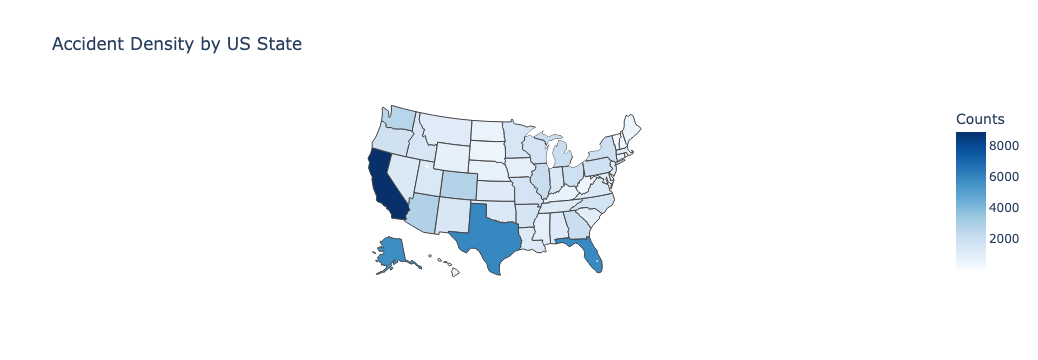

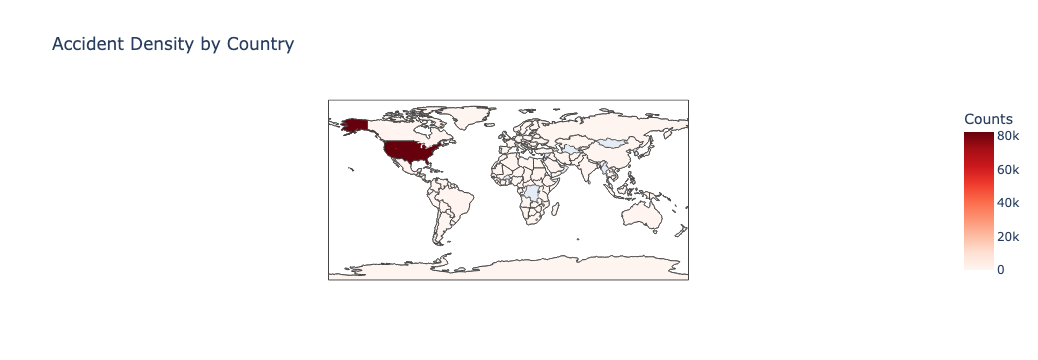

In [37]:
import plotly.express as px

# Referencing this: https://plotly.com/python/choropleth-maps/
# this separates the locations into City, State pairs
parts = aviation_df['Location'].str.split(',', n=1, expand=True)
aviation_df['State_Abbrev'] = parts[1].str.strip()

# we want to plot by state for the USA, and then by region (aka
# country) for areas outside of the USA
nonUSCountries = aviation_df[aviation_df['Country'] != 'USA']

# counting total accidents by state
state_counts = (
    aviation_df.groupby('State_Abbrev', dropna=True)
    .size()
    .reset_index(name='Counts')
)

# counting total accidents by country
country_counts = (
    nonUSCountries.groupby('Country', dropna=True)
    .size()
    .reset_index(name='Counts')
)

usa_map = px.choropleth(
    state_counts,
    locations='State_Abbrev',    
    locationmode='USA-states',  
    color='Counts',       
    color_continuous_scale='Blues',
    title='Accident Density by US State'
)

usa_map.update_geos(
    scope='usa',
    projection_type='albers usa' # including alaska + hawaii
)
usa_map.show()

abroad_map = px.choropleth(
    country_counts,
    locations='Country',    
    locationmode='country names',  
    color='Counts',       
    color_continuous_scale='Reds',
    title='Accident Density by Country'
)

abroad_map.show()

#### Identify and visualize "persistent danger zones" - locations with consistent accidents over time

Although there are some countries with a decent number of accidents such as Brazil with 374 recorded accidents, most of the accidents are concentrated in the USA, with around 82k recorded accidents. It seems that within the USA, California has the highest rate of accidents over time with 8857 recorded accidents. Texas, Florida, and Alasks follow with the three states having 5913, 5825, and 5672 recorded accidents respectively. This suggests that the USA, and especially California, Texas, Florida, and Alaska seem to be persistent danger zones.

### 5.2: Investigate seasonal and temporal patterns:

* Use a calendar heatmap to show when accidents occur most frequently. Are there seasonal accident patterns?

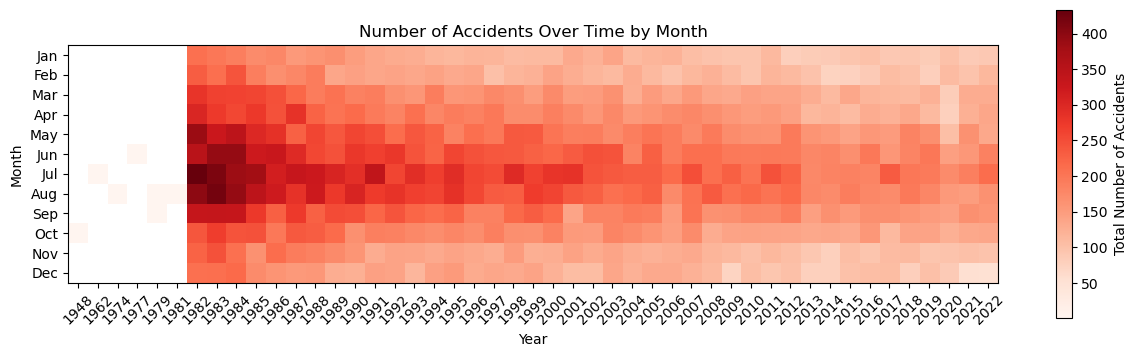

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

aviation_df['Years'] = aviation_df['Event.Date'].dt.year
aviation_df['Months'] = aviation_df['Event.Date'].dt.month

monthly_counts = (
    aviation_df.groupby(['Months', 'Years'])
    .size()
    .reset_index(name='Counts')
)

# we want to change the dataframe into something matplotlib can
# understand, so an array where the rows are months and cols are years
heatmap_data = (
    monthly_counts.pivot(index='Months', columns='Years', values='Counts')
)

plt.figure(figsize=(15, 4))
plt.imshow(heatmap_data, cmap='Reds')
plt.colorbar(label='Total Number of Accidents')
plt.xticks(
    ticks=range(len(heatmap_data.columns)), 
    labels=heatmap_data.columns, 
    rotation=45)
plt.yticks(
    ticks=range(12), 
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.title('Number of Accidents Over Time by Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# referenced these two:
# Stack overflow: Matplotlib and Numpy - Create a calendar heatmap
# Stack overflow: Plotting a 2D heatmap

#### Analysis

It seems that over time, the total number of accidents has decreased which is likely due to advancing technologies and safer aircrafts. In terms of seasonal patterns, it seems that the May to September months tend to have a higher number of accidents due to their blocks consistently being darker (indicating more accidents). This indicates that the mid-Spring, Summer, and early-Fall months tend to have a higher rate of accidents, with most of those concentrated in the Summer months from June to August. One reason could be because more people tend to travel in the Summer. This business could lead to a higher probability of accidents or more stress placed on pilots and airport systems.

Insight Goal: Identify when and where additional safety measures or restrictions might be needed.